# <center><span style="font-family: Arial; font-weight:bold;font-size:2.4em;color:#FF8C00;">Project - Ensemble Techniques</center>

### Library packages version:

    numpy - 1.25.1
    pandas - 2.0.3
    scikit-learn - 1.2.2
    scipy - 1.11.1
    seaborn - 0.12.2
    matplotlib - 3.7.2
    matplotlib-inline - 0.1.6
    statsmodels - 0.14.0

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#8B008B;">Project & Data Information

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DOMAIN`: Telecommunications.

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `CONTEXT`: A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs. 

        
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `DATA DESCRIPTION`: The dataset is relevant for understanding customer churn behavior and predicting customer churn. Analyzing customer churn is important for businesses to identify factors that contribute to customer attrition and develop strategies to retain customers.

<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:purple"> Data Dictionary for dataset 'TelcomCustomer-Churn_1':
    
1. `customerID`: Unique identifier for each customer.
2. `gender`: Gender of the customer (e.g., Male or Female).
3. `SeniorCitizen`: Indicates if the customer is a senior citizen (1) or not (0).
4. `Partner`: Indicates if the customer has a partner (e.g., Yes or No).
5. `Dependents`: Indicates if the customer has dependents (e.g., Yes or No).
6. `tenure`: Number of months the customer has been with the company.
7. `PhoneService`: Indicates if the customer has phone service (e.g., Yes or No).
8. `MultipleLines`: Indicates if the customer has multiple lines (e.g., Yes, No, or No phone service).
9. `InternetService`: Type of internet service subscribed by the customer (e.g., DSL, Fiber optic, or No).
10. `OnlineSecurity`: Indicates if the customer has online security service (e.g., Yes, No, or No internet service).
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:purple"> Data Dictionary for dataset 'TelcomCustomer-Churn_2':
    
1. `customerID`: Unique identifier for each customer.
2. `OnlineBackup`: Indicates if the customer has online backup service (e.g., Yes, No, or No internet service).
3. `DeviceProtection`: Indicates if the customer has device protection service (e.g., Yes, No, or No internet service).
4. `TechSupport`: Indicates if the customer has technical support service (e.g., Yes, No, or No internet service).
5. `StreamingTV`: Indicates if the customer has streaming TV service (e.g., Yes, No, or No internet service).
6. `StreamingMovies`: Indicates if the customer has streaming movie service (e.g., Yes, No, or No internet service).
7. `Contract`: Type of contract the customer has (e.g., Month-to-month, One year, Two year).
8. `PaperlessBilling`: Indicates if the customer has opted for paperless billing (e.g., Yes or No).
9. `PaymentMethod`: Payment method used by the customer (e.g., Electronic check, Credit card, Bank transfer, Mailed check).
10. `MonthlyCharges`: The amount charged to the customer per month (Numeric).
11. `TotalCharges`: The total amount charged to the customer (Numeric).
12. `Churn`: It is the target variable that indicates whether a customer has churned (e.g., Yes or No).
    
<span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#666666"> `PROJECT OBJECTIVE`: The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.    

### Importing all necessary libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

### <span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#008080;">1. Data Understanding & Exploration

### 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [2]:
d1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

### 1 b. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [3]:
d2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

### 1 c. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [4]:
df = pd.merge(d1, d2, on='customerID')

### 1 d. Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python

In [5]:
# Get the column names from both original DataFrames
columns_d1 = d1.columns
columns_d2 = d2.columns

# Get the column names from the merged DataFrame
columns_merged = df.columns

# Check if the columns from both original DataFrames are incorporated in the merged DataFrame
all_cols_incorporated = set(columns_d1).union(set(columns_d2)) == set(columns_merged)

# Print the result
print("All columns are incorporated in the merged DataFrame:", all_cols_incorporated)

All columns are incorporated in the merged DataFrame: True


### <span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#008080;"> 2. Data Cleaning & Analysis

### 2 a. Impute missing/unexpected values in the DataFrame

Let's first take a glance at the Dataset and its shape.

In [6]:
pd.set_option('display.max_columns', None)
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1933,1964-SVLEA,Male,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,415.9,No
3396,5578-NKCXI,Female,0,Yes,Yes,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),99.25,5846.65,No
6493,6576-FBXOJ,Male,0,Yes,No,17,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,54.60,934.8,No
6597,9210-IAHGH,Female,0,No,No,7,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),70.75,450.8,Yes
1268,2408-TZMJL,Male,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,110.15,6448.05,Yes
4362,8430-TWCBX,Female,0,Yes,No,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.70,1032.05,No
3838,7714-YXSMB,Female,0,No,No,26,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.50,2599.95,No
5952,4430-YHXGG,Female,0,No,Yes,4,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.45,84.2,No
2614,3351-NQLDI,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),94.35,6341.45,Yes
2247,0362-RAOQO,Female,0,No,No,40,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,830.25,No


In [7]:
print('Total number of Rows in Dataset:',df.shape[0])
print('Total number of Columns in Dataset:',df.shape[1])

Total number of Rows in Dataset: 7043
Total number of Columns in Dataset: 21


Now let's look at the overview of the Dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observations -

* `Categorical Features`: The majority of the features in the dataset are categorical, represented as objects. These features include 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', and 'Churn'. These features likely have discrete categories describing different attributes of the customers or their services.
* `Numerical Features`: There are three numerical features in the dataset: 'SeniorCitizen', 'tenure', and 'MonthlyCharges'. 'SeniorCitizen' is a binary variable, 'tenure' represents the number of months, and 'MonthlyCharges' represents the charges as a continuous numeric value.
* `TotalCharges DataType`: The 'TotalCharges' column, which might be expected to contain numeric values, is represented as an object data type. This suggests that there might be some unexpected values or missing values represented as strings in this column.
* `Missing Values`: The 'Non-Null Count' information shows that there are no missing values in any of the columns (all columns have 7043 non-null values). However, it's important to consider the possibility that missing values might be encoded as unexpected values in certain columns (e.g., 'TotalCharges').

Let's now look at the number of unique values in column 'TotalCharges'.

In [9]:
df['TotalCharges'].nunique()

6531

As we can see that there are total 6531 uniques values in this columns and so manually looking for the unexpected values individually would not be feasible. Therefore what we can do is to attempt converting the column to a numeric data type using `pd.to_numeric()` and then check for any non-numeric values that could not be converted.

In [10]:
# Convert 'TotalCharges' to numeric and handle non-numeric values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify rows with non-numeric values in 'TotalCharges' column
non_numeric_rows = df[df['TotalCharges'].isnull()]

# Display the rows with non-numeric values
non_numeric_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


So these are the rows where the column 'TotalCharges' have unexpected values.

Let's see the percentage of these missing values in the dataset.

In [11]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
TotalCharges,11,0.156183


In [12]:
# Check for the Distribution of Target variable
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

We observe that the distribution of target variable is highly imbalanced.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#228B22;"> We can observe that the target column(Churn) datapoints in all the missing rows for column 'TotalCharges' are the same (i.e., 'No' for Churn), therefore using the median value of the 'TotalCharges' column for the class 'No' is a reasonable and better option for imputation. By imputing the missing values with the median value of the 'TotalCharges' column for the 'No' class, we can maintain the consistency of the data and avoid introducing any bias in the data distribution and also ensures that the imputed values are relevant and meaningful in the context of the data.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#228B22;">`NOTE`: Both imputing the missing values with the mean or median would be reasonable choices but we will go with `Median Imputation` method as it is more robust in the presence of outliers and in a highly imbalanced target column, imputing missing values with the median might be a safer option to avoid affecting the minority class (Churn = 'Yes').

Let's now look at the median value for the column 'TargetCharges' with respect to different class labels of Target variable.

In [13]:
df.groupby(['Churn'])[['TotalCharges']].median()

,TotalCharges
Churn,
No,1683.60
Yes,703.55


Let's now impute the missing values with the median value.

In [14]:
# Calculate the median value for each group (Churn = 'Yes' and Churn = 'No')
median_by_churn = df.groupby(['Churn'])[['TotalCharges']].transform('median')

# Impute missing values with the respective median values based on 'Churn' group
df['TotalCharges'].fillna(median_by_churn['TotalCharges'], inplace=True)

Let's verify the imputation.

In [15]:
df['TotalCharges'].isnull().sum()

0

In [16]:
ind = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
df.iloc[ind]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1683.6,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1683.6,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,1683.6,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1683.6,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,1683.6,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,1683.6,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,1683.6,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,1683.6,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,1683.6,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,1683.6,No


#### Therefore the missing values have been imputed successfully.

### 2 b. Make sure all the variables with continuous values are of ‘Float’ type

First lets convert the columns with an 'object' datatype into 'categorical' variables.

In [17]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])

In [18]:
df.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

Columns with an 'object' datatype have converted into 'categorical' variable.

We can see that columns `tenure`, `MonthlyCharges` and `TotalCharges` are continuous in nature out of which columns 'MonthlyCharges' and 'TotalCharges' are already of datatype 'float64' except 'tenure' which is of datatype 'int64'. So let's convert column 'tenure' to datatype 'float'. 

In [19]:
df['tenure'] = df['tenure'].astype(float)

In [20]:
df.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure               float64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

#### Therefore all the variables with continuous values are converted to ‘Float’ type.

### 2 c. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

Let's first drop 'customerID' column from the dataset as it typically represents a unique identifier for each record in the dataset, which does not provide any meaningful information for model prediction.

In [21]:
df.drop('customerID', axis=1, inplace=True)

Let's now create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features.

In [22]:
def plot_categorical_pie_charts(dataframe, ncols=3, colors=None):
    # Identify categorical columns
    cat_cols = dataframe.select_dtypes(include='category').columns

    # Calculate the number of rows needed for subplots
    nrows = (len(cat_cols) + ncols - 1) // ncols

    # Create subplots with exact number of rows and columns needed
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows), constrained_layout=True)

    # Create pie chart for each categorical column
    for idx, column in enumerate(cat_cols):
        cat_counts = dataframe[column].value_counts()
        total_count = len(dataframe)
        percentages = cat_counts / total_count * 100

        # Plot the pie chart in the appropriate subplot
        ax = axes[idx // ncols, idx % ncols]
        ax.pie(percentages, labels=cat_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        ax.set_title(f"Percentage Distribution of '{column}'")
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # If there are empty subplots, remove them
    if len(cat_cols) < nrows * ncols:
        for i in range(len(cat_cols), nrows * ncols):
            fig.delaxes(axes.flatten()[i])

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

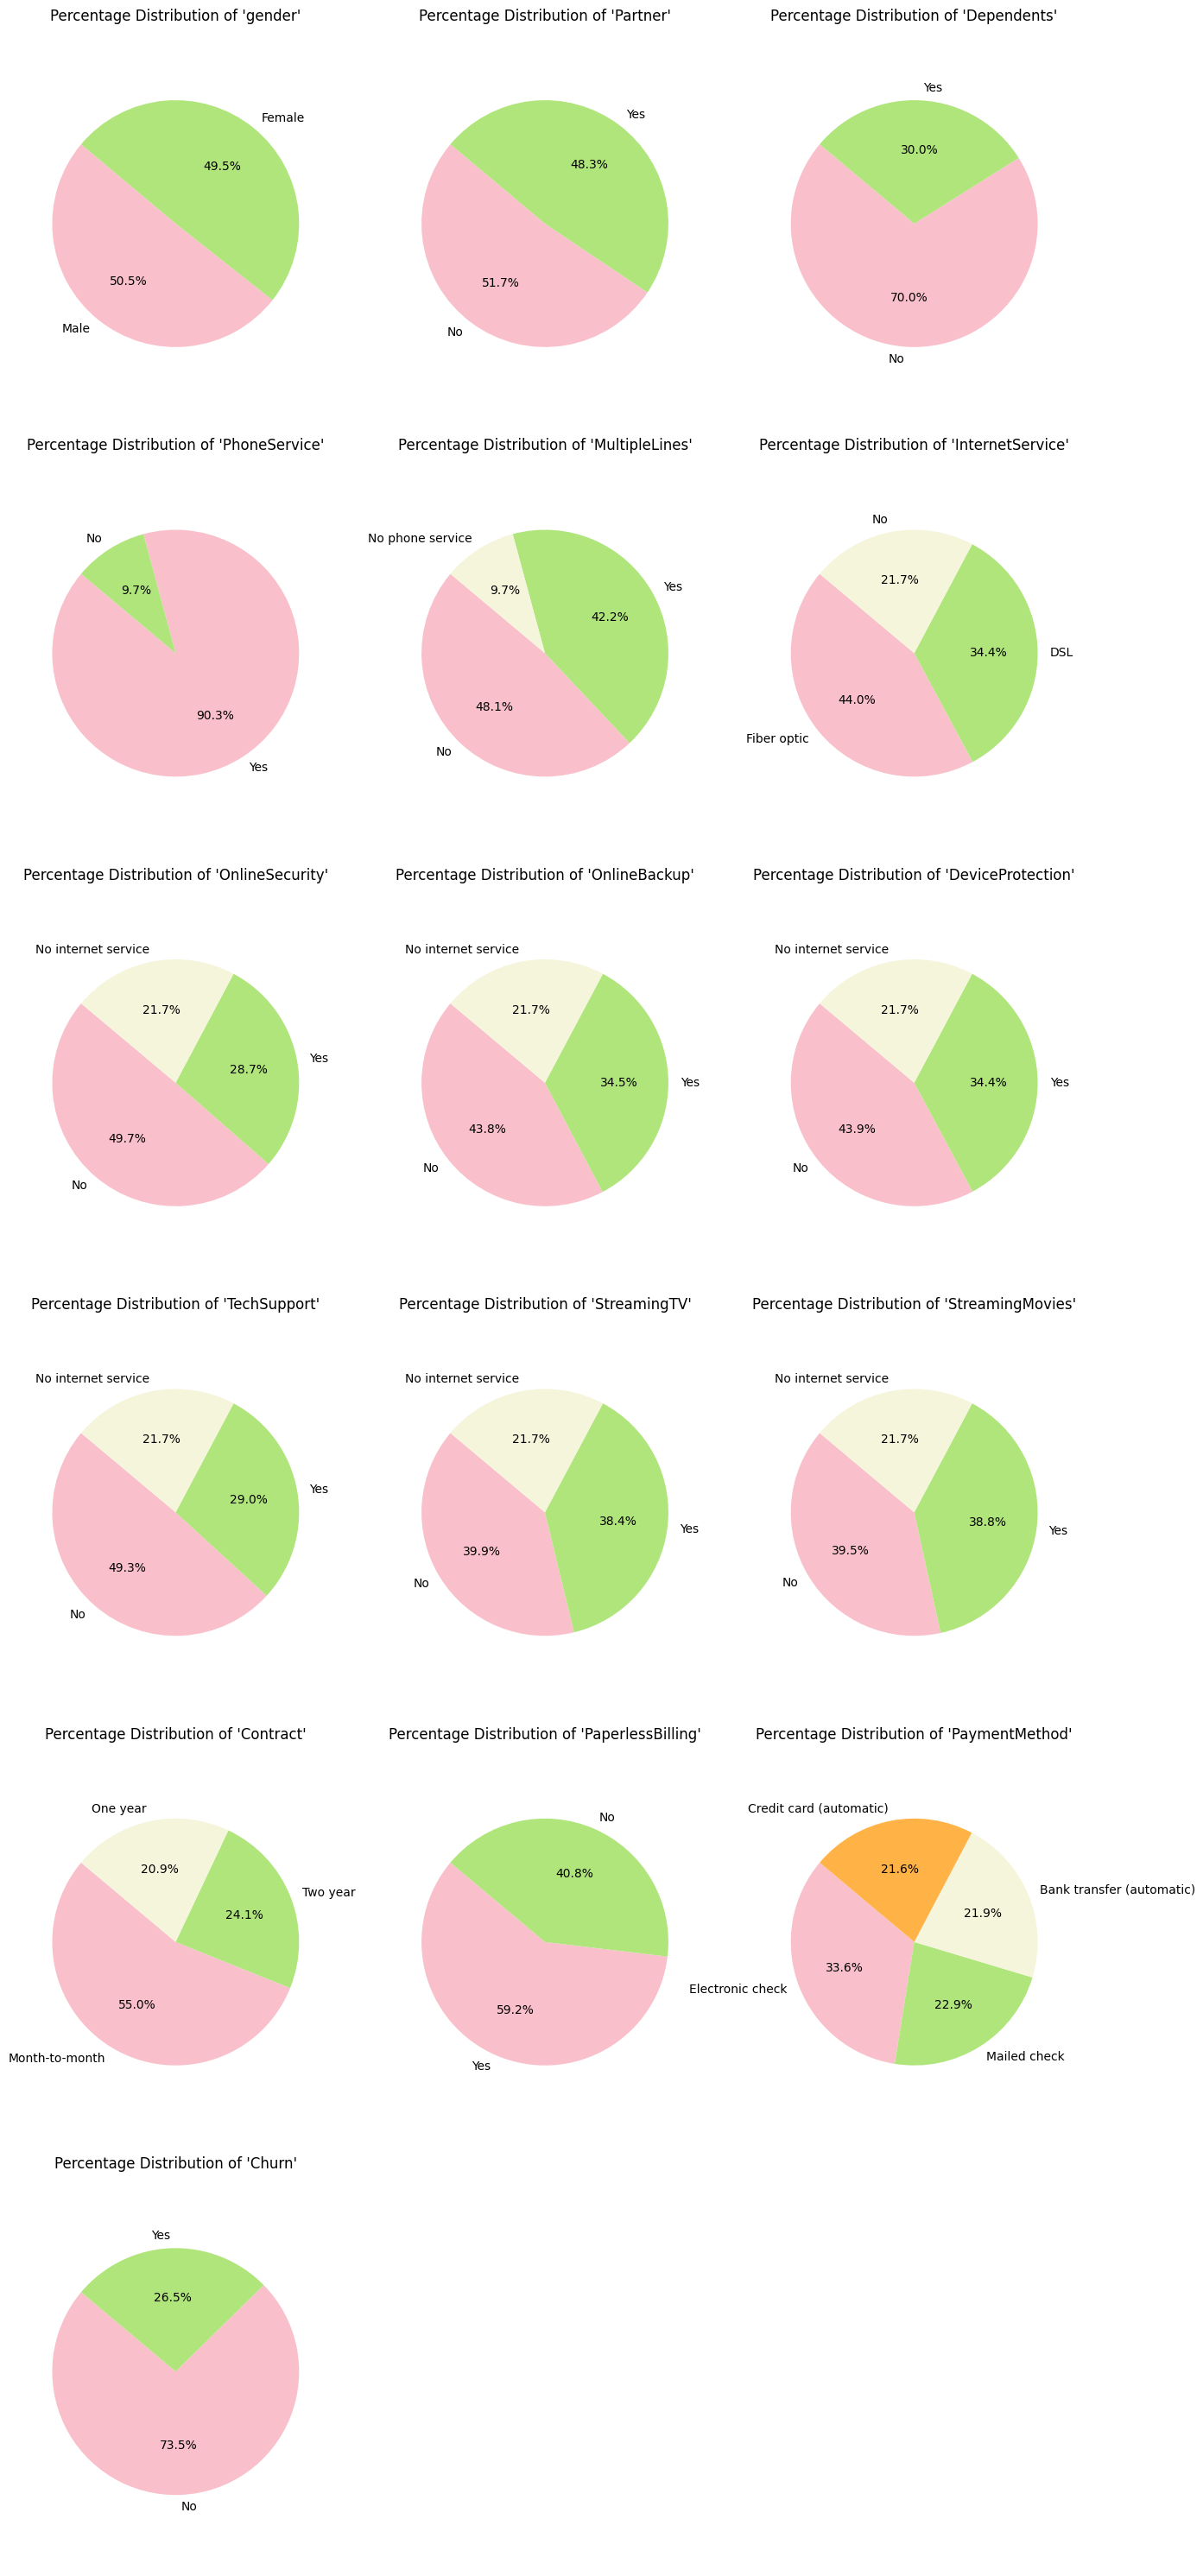

In [30]:
warnings.filterwarnings("ignore")

custom_colors = ['#F9C0CB', '#B0E57C', 'beige', '#FFB347']

plot_categorical_pie_charts(df, ncols=3, colors=custom_colors)

### 2 d. Share insights for Q2.c

### Observation -

* `Gender`: The number of male customers is slightly higher than female customers, but the difference is not significant.
* `Partner and Dependents`: The number of customers without partners is slightly higher than those with partners. However, there are more customers without dependents compared to customers with dependents.
* `PhoneService`: The vast majority of customers have phone service, while a small number of customers do not.
* `MultipleLines`: Most customers either have a single phone line or multiple lines. A small number of customers have no phone service at all.
* `InternetService`: Fiber optic and DSL are the two main types of internet services provided to customers. A significant number of customers have fiber optic internet, followed by DSL, while a smaller group of customers do not have internet service.
* `OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies`: For each of these features, a large number of customers do not subscribe to the service. Many customers have 'No internet service,' indicating that they may have not subscribed to internet service at all.
* `Contract`: Most customers have month-to-month contracts, followed by two-year contracts and one-year contracts.
* `PaperlessBilling`: There are more customers who prefer paperless billing compared to those who don't.
* `PaymentMethod`: The electronic check is the most common payment method, followed by mailed check, bank transfer (automatic), and credit card (automatic).
* `Churn`: The dataset is imbalanced with a higher number of customers labeled as 'No' (not churned) compared to 'Yes' (churned).

### 2 e. Encode all the appropriate Categorical features with the best suitable approach

Let's first look at the number of unique values of all the categorical variables.

In [24]:
# Create a list to store column names and corresponding unique value counts
column_names = list(df.select_dtypes(include='category').columns)
unique_val_counts = []

# Iterate through each categorical column and calculate the unique value count
for column in column_names:
    unique_vals = df[column].nunique()
    unique_val_counts.append(unique_vals)

# Create a DataFrame to display the results
cat_info_df = pd.DataFrame({'Categorical_column': column_names, 'Unique_value_count': unique_val_counts})

cat_info_df

,Categorical_column,Unique_value_count
0,gender,2
1,Partner,2
2,Dependents,2
3,PhoneService,2
4,MultipleLines,3
5,InternetService,3
6,OnlineSecurity,3
7,OnlineBackup,3
8,DeviceProtection,3
9,TechSupport,3


In [25]:
replaceStruct = {
                "Contract":{"Month-to-month": 0, "One year": 1 ,"Two year": 2},
                "gender":{"Female":0, "Male":1},
                "Partner":{"No":0, "Yes":1},
                "Dependents":{"No":0, "Yes":1},
                "PhoneService":{"No":0, "Yes":1},
                "PaperlessBilling":{"No":0, "Yes":1},
                "Churn":{"No":0, "Yes":1}
}# Encoding these columns using Label-encoding

oneHotCols=[
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaymentMethod'
]
# Encoding these columns using one-hot encoding

In [26]:
df = df.replace(replaceStruct)
df = pd.get_dummies(df, columns=oneHotCols, drop_first=True)
# Argument drop_first = True to handle the issue of Multicollinearity

In [27]:
df.dtypes

gender                                   category
SeniorCitizen                               int64
Partner                                  category
Dependents                               category
tenure                                    float64
PhoneService                             category
Contract                                 category
PaperlessBilling                         category
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                    category
MultipleLines_No phone service               bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_No internet service           bool
OnlineSecurity_Yes                           bool
OnlineBackup_No internet service             bool
OnlineBackup_Yes                             bool
DeviceProtection_No internet service         bool


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34.0,1,1,0,56.95,1889.50,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,2.0,1,0,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45.0,0,1,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False
4,0,0,0,0,2.0,1,0,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


As we can see that all the Categorical features have been encoded with suitable approach.

### 2 f. Split the data into 80% train and 20% test

In [29]:
# Splitting data into x and y
X = df.drop(labels="Churn", axis = 1)
y = df["Churn"]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,1,29.85,29.85,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34.0,1,1,0,56.95,1889.50,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,2.0,1,0,1,53.85,108.15,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45.0,0,1,0,42.30,1840.75,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False
4,0,0,0,0,2.0,1,0,1,70.70,151.65,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [30]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [31]:
X_train.shape

(5634, 29)

##### We have split the data into train and test set in ratio 80:20.

### 2 g. Normalize/Standardize the data with the best suitable approach

Let's first look at the basic statistical description of numerical features.

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2282.363808,2265.124074,18.80,402.225,1400.55,3786.60,8684.80


Let's look at the boxplot for the columns 'tenure', 'MonthlyCharges' and 'TotalCharges'.

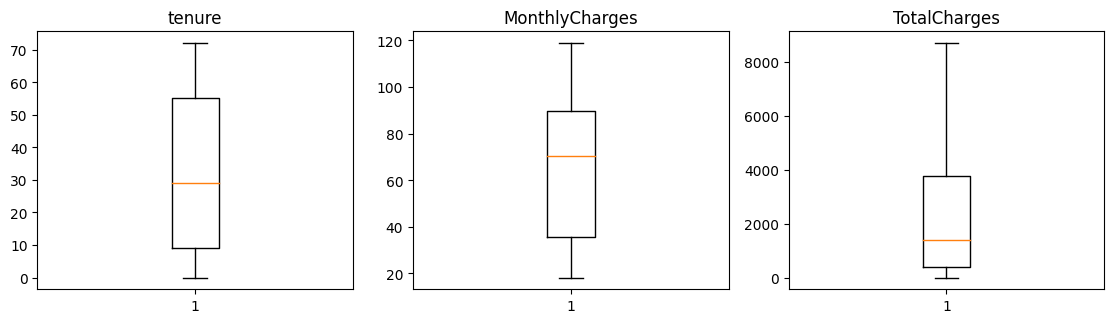

In [34]:
warnings.filterwarnings("ignore")

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:saddlebrown;"> From the above table & visualization the statistics for the features 'tenure', 'MonthlyCharges' and 'TotalCharges' seem within a reasonable range and there are no outliers present in the columns. Therefore we can use `MinMaxScaler` method to scale the features as it preserves the relative relationships between data points.

In [53]:
# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the Min-Max scaler on X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Fit and transform the Min-Max scaler on X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [54]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.161874,0.368368,0.0,0.000000,0.000000,0.000000,1.0
tenure,5634.0,0.448305,0.341045,0.0,0.125000,0.402778,0.763889,1.0
MonthlyCharges,5634.0,0.463438,0.299851,0.0,0.170817,0.519173,0.713147,1.0
TotalCharges,5634.0,0.260906,0.261354,0.0,0.043154,0.159047,0.434883,1.0


In [55]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,1409.0,0.163236,0.369712,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,1409.0,0.454775,0.341413,0.000000,0.125000,0.402778,0.777778,1.000000
MonthlyCharges,1409.0,0.462570,0.299211,0.004482,0.185259,0.516932,0.713147,1.000996
TotalCharges,1409.0,0.262377,0.261575,0.000046,0.047063,0.161926,0.434480,0.998575


##### Therefore we have Normalize/Standardize the data with the best suitable approach.

### <span style="font-family: Arial; font-weight:bold;font-size:2em;color:#008080;">3. Model building and Performance improvement

Before we build the model let's first creat a function that evaluates the performance metrics for a given classifier model and prints the results.

In [57]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    # Train the model on the scaled training data
    model.fit(X_train, y_train)

    # Make predictions on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model's performance on the training data
    print("• Performance on Training Data: \n")
    print("  Accuracy:", accuracy_score(y_train, y_train_pred))
    print("  Precision:", precision_score(y_train, y_train_pred))
    print("  Recall:", recall_score(y_train, y_train_pred))
    print("  F1 Score:", f1_score(y_train, y_train_pred))
    print("  Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred),'\n')

    # Evaluate the model's performance on the test data
    print("\n• Performance on Test Data: \n")
    print("  Accuracy:", accuracy_score(y_test, y_test_pred))
    print("  Precision:", precision_score(y_test, y_test_pred))
    print("  Recall:", recall_score(y_test, y_test_pred))
    print("  F1 Score:", f1_score(y_test, y_test_pred),'\n')

    # Print confusion matrix for Test data
    print("  Confusion Matrix:")
    cm1=metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])
    df_cm1 = pd.DataFrame(cm1, index = [i for i in ["No(0)","Yes(1)"]],
                  columns = [i for i in ["No(0)","Yes(1)"]])
    plt.figure(figsize = (5,4))
    sns.heatmap(df_cm1, annot=True ,fmt='g', cmap='Pastel1')
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    print()

### 3 a. Train a model using Decision tree and check the performance of the model on train and test data

• Performance on Training Data: 

  Accuracy: 0.9980475683351083
  Precision: 0.9993386243386243
  Recall: 0.9934253780407627
  F1 Score: 0.9963732278272337
  Confusion Matrix:
 [[4112    1]
 [  10 1511]] 


• Performance on Test Data: 

  Accuracy: 0.7430801987224982
  Precision: 0.48372093023255813
  Recall: 0.5977011494252874
  F1 Score: 0.5347043701799485 

  Confusion Matrix:



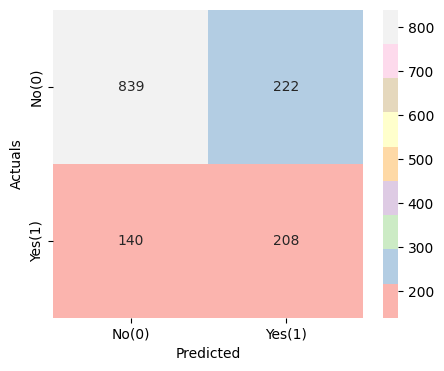

In [58]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=1)

# Evaluate the performance of the Decision Tree model
evaluate_model(decision_tree, X_train, y_train, X_test, y_test)

### 3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [66]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=1)

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 15)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': list(range(1, 5))
}

# Initialize GridSearchCV with the Decision Tree classifier and the hyperparameter grid
grid_search = GridSearchCV(decision_tree, param_grid, cv=10, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


##### We have got the best parameter combination so lets now check the performance of the model on train and test data.

• Performance on Training Data: 

  Accuracy: 0.8136315228966986
  Precision: 0.6928746928746928
  Recall: 0.5562130177514792
  F1 Score: 0.6170678336980306
  Confusion Matrix:
 [[3738  375]
 [ 675  846]] 


• Performance on Test Data: 

  Accuracy: 0.794889992902768
  Precision: 0.5896656534954408
  Recall: 0.5574712643678161
  F1 Score: 0.5731166912850814 

  Confusion Matrix:



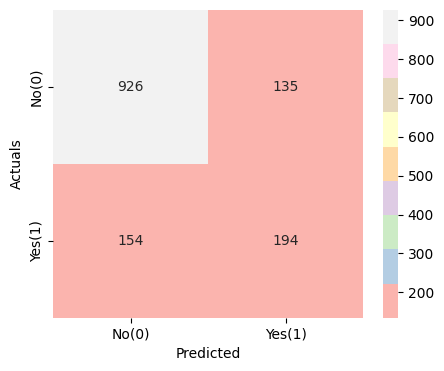

In [59]:
best_decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_leaf=4,
    min_samples_split=10,
    splitter='random',
    random_state=1
)

# Evaluate the performance of the Decision Tree model with best parameter combination
evaluate_model(best_decision_tree, X_train, y_train, X_test, y_test)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Differences Observed in Performance:

* `Overfitting`: The default Decision Tree model showed signs of overfitting, with significantly higher accuracy, precision, and recall on the training data compared to the test data. In contrast, the model with hyper-parameter tuning (Grid Search) improved generalization to some extent by reducing the overfitting.
* `Model Complexity`: The default model's high accuracy on the training data might be due to its high complexity, which allowed it to memorize the training data. However, this complexity did not translate well to the test data, resulting in lower performance on unseen data. The model with grid search used more appropriate hyper parameters, which reduced the complexity and improved generalization.

### 3 c. Train a model using Random forest and check the performance of the model on train and test data

• Performance on Training Data: 

  Accuracy: 0.9980475683351083
  Precision: 0.997364953886693
  Recall: 0.9953977646285339
  F1 Score: 0.9963803882856204
  Confusion Matrix:
 [[4109    4]
 [   7 1514]] 


• Performance on Test Data: 

  Accuracy: 0.7991483321504613
  Precision: 0.6031746031746031
  Recall: 0.5459770114942529
  F1 Score: 0.5731523378582203 

  Confusion Matrix:



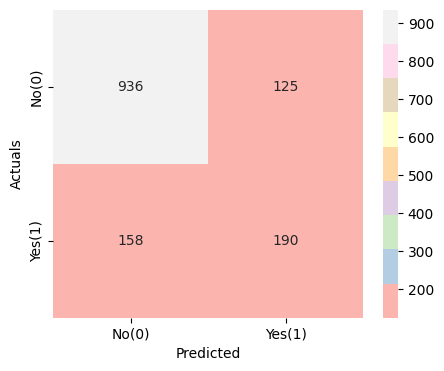

In [60]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=1)

# Evaluate the performance 
evaluate_model(random_forest, X_train, y_train, X_test, y_test)

### 3 d. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [67]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=1)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 20, 30], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': list(range(1, 5)), # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV with the Random Forest classifier and the hyperparameter grid
grid_search = GridSearchCV(random_forest, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


##### These are the best parameter combination so lets now check the performance of the model on train and test data.

• Performance on Training Data: 

  Accuracy: 0.8597799077032304
  Precision: 0.7959514170040486
  Recall: 0.646285338593031
  F1 Score: 0.7133526850507983
  Confusion Matrix:
 [[3861  252]
 [ 538  983]] 


• Performance on Test Data: 

  Accuracy: 0.815471965933286
  Precision: 0.6419354838709678
  Recall: 0.5718390804597702
  F1 Score: 0.6048632218844985 

  Confusion Matrix:



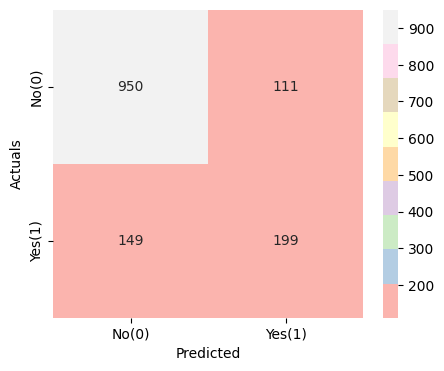

In [61]:
# Initialize the Random Forest classifier
best_random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    bootstrap=True,
    random_state=1 
)

# Evaluate the performance 
evaluate_model(best_random_forest, X_train, y_train, X_test, y_test)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Differences Observed in Performance:
    
* `Overfitting Reduction`: The performance improvement observed after grid search suggests that the hyperparameter tuning helped reduce overfitting. The previous model had a high accuracy on the training data but lower accuracy on the test data, indicating overfitting. With grid search, the model's generalization to unseen data improved, resulting in a more balanced performance on both training and test sets.
* `Model Generalization`: The second model with hyperparameter tuning has better generalization capability as indicated by the improved performance on the test data. It is more likely to perform well on new, unseen data.
* `Trade-off`: It's important to note that while the second model performs better on the test data, it may not achieve the same level of performance on the training data as the first model. This is because the second model is tuned for better generalization, which may result in slightly lower training set performance.

### 3 e. Train a model using Adaboost and check the performance of the model on train and test data

• Performance on Training Data: 

  Accuracy: 0.808839190628328
  Precision: 0.6825657894736842
  Recall: 0.5456936226166995
  F1 Score: 0.6065034709535989
  Confusion Matrix:
 [[3727  386]
 [ 691  830]] 


• Performance on Test Data: 

  Accuracy: 0.8133427963094393
  Precision: 0.6402640264026402
  Recall: 0.5574712643678161
  F1 Score: 0.5960061443932412 

  Confusion Matrix:



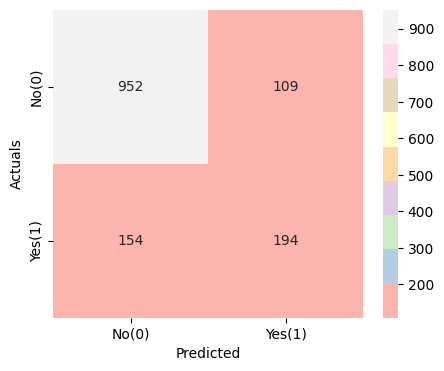

In [62]:
# Initialize the AdaBoost classifier
ada_cl = AdaBoostClassifier()

# Evaluate the performance 
evaluate_model(ada_cl, X_train, y_train, X_test, y_test)

### 3 f. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [41]:
# Create the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(random_state=1)

# Create the AdaBoost Classifier
ada_clf = AdaBoostClassifier(estimator=base_estimator)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200, 300], # Number of estimators (trees)
    'learning_rate': [0.1, 0.5, 1.0], # Learning rate
    'algorithm': ['SAMME', 'SAMME.R'] # Boosting algorithm
}

# Create the GridSearchCV object
grid_search = GridSearchCV(ada_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


##### These are the best parameter combination so lets now check the performance of the model on train and test data.

• Performance on Training Data: 

  Accuracy: 0.8029818956336529
  Precision: 0.6929577464788732
  Recall: 0.48520710059171596
  F1 Score: 0.5707656612529002
  Confusion Matrix:
 [[3786  327]
 [ 783  738]] 


• Performance on Test Data: 

  Accuracy: 0.8097941802696949
  Precision: 0.644927536231884
  Recall: 0.5114942528735632
  F1 Score: 0.5705128205128206 

  Confusion Matrix:



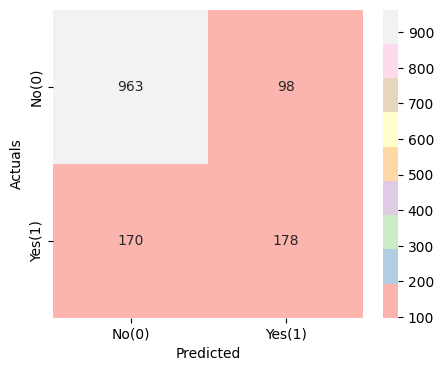

In [63]:
# Initialize the AdaBoost classifier with the best hyperparameters
best_ada = AdaBoostClassifier(
    n_estimators=100,
    algorithm='SAMME.R',
    learning_rate=0.1,
    random_state=1
)

# Evaluate the performance 
evaluate_model(best_ada, X_train, y_train, X_test, y_test)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Differences Observed in Performance:
    
* The performance of the AdaBoost model slightly decreased after grid search on both the training and test data due to slight decrease in the model's accuracy, precision, recall, and F1 score on both the training and test data after grid search.
* The confusion matrices for both training and test data after grid search were similar to those before grid search, with only slight changes in the number of true positives, true negatives, false positives, and false negatives.


### 3 g. Train a model using GradientBoost and check the performance of the model on train and test data

• Performance on Training Data: 

  Accuracy: 0.8219737309194178
  Precision: 0.7144039735099338
  Recall: 0.5673898750821827
  F1 Score: 0.6324661048002932
  Confusion Matrix:
 [[3768  345]
 [ 658  863]] 


• Performance on Test Data: 

  Accuracy: 0.8076650106458482
  Precision: 0.6222222222222222
  Recall: 0.5632183908045977
  F1 Score: 0.5912518853695324 

  Confusion Matrix:



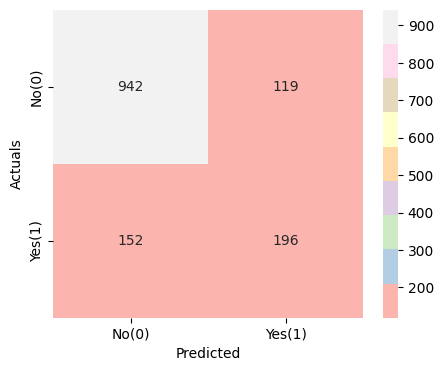

In [64]:
# Initialize the GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)

# Evaluate the performance 
evaluate_model(gbcl, X_train, y_train, X_test, y_test)

### 3 h. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [48]:
# Initialize the GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
    'max_depth': list(range(1, 5))
}

# Initialize the GridSearchCV 
grid_search = GridSearchCV(grad_boost, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 1.0, 'max_depth': 1, 'n_estimators': 50}


##### These are the best parameter combination so lets now check the performance of the model on train and test data.

• Performance on Training Data: 

  Accuracy: 0.8097266595669151
  Precision: 0.6823720552396426
  Recall: 0.5522682445759369
  F1 Score: 0.6104651162790699
  Confusion Matrix:
 [[3722  391]
 [ 681  840]] 


• Performance on Test Data: 

  Accuracy: 0.8112136266855926
  Precision: 0.6339869281045751
  Recall: 0.5574712643678161
  F1 Score: 0.5932721712538227 

  Confusion Matrix:



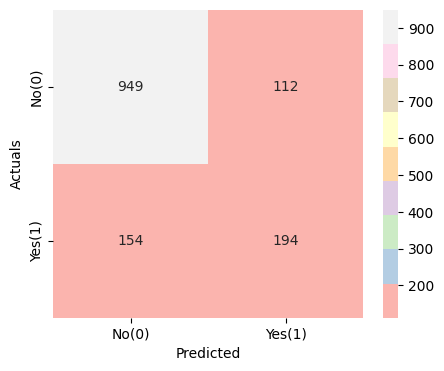

In [65]:
# Initialize the GradientBoostingClassifier
best_gb = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=1.0,
    max_depth=1,
    random_state=1
)

# Evaluate the performance 
evaluate_model(best_gb, X_train, y_train, X_test, y_test)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Differences Observed in Performance:
    
* The model with grid search slightly improved the performance on the training data in terms of accuracy, precision, recall, and F1 score compared to the model without grid search. However, the differences in performance between the two models are relatively small.
* On the test data, the model with grid search also shows slight improvements in precision, recall, and F1 score compared to the model without grid search.
* Overall, the model with grid search provides marginally better performance on both training and test data, but the differences may not be significant.

## 3 i. Provide detailed analysis of the below steps
    1. Compare the performance of each model in train stage and test stage
    2. Provide your observation on which model performed the best
    3. Provide your reasoning on why the model performed best
    4. Provide your final conclusion on your observation

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">1. Performance comparison of each model 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.6em;"> i. `Decision Tree` -
    

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » Default Model:

* `Training Data`: The default Decision Tree model achieved very high accuracy (approximately 99.8%) on the training data. It shows excellent performance in predicting the majority class (No Churn) but still has a good ability to detect the minority class (Churn) with high precision and recall (approximately 99.9% precision and 99.3% recall).
* `Test Data`: However, the model's performance on the test data is not as good as on the training data. It achieved an accuracy of approximately 74.3%, which indicates that it does not generalize well to unseen data. The precision, recall, and F1 score on the test data are significantly lower than on the training data. This suggests that the model is overfitting to the training data.
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » After Grid Search:

* `Training Data`: After performing grid search for hyper-parameter tuning, the model's performance on the training data has improved compared to the default model but is not as high as before. The accuracy is approximately 81.4%, indicating that it has slightly better generalization compared to the default model on the test data.
* `Test Data`: The performance on the test data has also improved compared to the default model. The accuracy is approximately 79.5%, indicating better generalization to unseen data. The precision, recall, and F1 score on the test data are higher than in the default model, but they are still not high, indicating that the model may not be capturing the complexity of the data well.   
    
<span style="font-family: Arial; font-weight:bold;font-size:1.6em;"> ii. `Random Forest` -

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » Default Model:
    
* The model performs very well on the training data with an accuracy of 99.80% and high precision, recall, and F1 score, indicating excellent performance on the training set.
* However, on the test data, the performance drops slightly with an accuracy of 79.91%, lower precision, recall, and F1 score compared to the training data. This suggests that the model may be slightly overfitting the training data and not generalizing well to unseen data.
    
<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » After Grid Search:
    
* After using grid search to find the best hyperparameters, the model's performance has improved on both training and test data.
* The accuracy on the training data is now 85.98%, and the precision, recall, and F1 score have also improved significantly, indicating better overall performance on the training set compared to the previous model.
* On the test data, the model's performance has also improved with an accuracy of 81.55% and improved precision, recall, and F1 score compared to the previous model.
* The confusion matrix shows that the model is now making better predictions on both the positive and negative classes.    
   
<span style="font-family: Arial; font-weight:bold;font-size:1.6em;">iii. `AdaBoost` -

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » Default Model:
    
* The AdaBoost model achieved an accuracy of approximately 80.88% on the training data. It had a precision of about 68.26%, recall of 54.57%, and an F1 score of 60.65%. The confusion matrix showed 3727 true negatives, 386 false positives, 691 false negatives, and 830 true positives.
* The AdaBoost model achieved an accuracy of approximately 81.33% on the test data. It had a precision of about 64.03%, recall of 55.75%, and an F1 score of 59.60%. The confusion matrix showed 963 true negatives, 98 false positives, 170 false negatives, and 178 true positives.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » After Grid Search:
    
* After performing grid search for hyper-parameter tuning, the AdaBoost model achieved an accuracy of approximately 80.30% on the training data. It had a precision of about 69.30%, recall of 48.52%, and an F1 score of 57.08%. The confusion matrix showed 3786 true negatives, 327 false positives, 783 false negatives, and 738 true positives.    
* After performing grid search for hyper-parameter tuning, the AdaBoost model achieved an accuracy of approximately 80.98% on the test data. It had a precision of about 64.49%, recall of 51.15%, and an F1 score of 57.05%. The confusion matrix showed 963 true negatives, 98 false positives, 170 false negatives, and 178 true positives.   
    
<span style="font-family: Arial; font-weight:bold;font-size:1.6em;"> iv. `GradientBoost` -

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » Default Model:

* The model performed quite well on the training data with an accuracy of approximately 82.20%.
* The model achieved a high precision of around 71.44%, indicating that when it predicts a customer will churn (positive class), it is often correct.
* The recall score of about 56.74% suggests that the model is capable of identifying a considerable portion of the actual churn cases in the training data.
* The F1 score of approximately 63.25% is a harmonic mean of precision and recall, indicating a good balance between the two metrics.
* On the test data, the model achieved an accuracy of around 80.77%, which is slightly lower than the training accuracy.
* The precision on the test data is approximately 62.22%, indicating that the model's predictions of churn are relatively accurate.
* The recall on the test data is approximately 56.32%, showing that the model can identify a substantial portion of the actual churn cases in the test data.
* The F1 score on the test data is around 59.13%, which is slightly lower than the F1 score on the training data.


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> » After Grid Search:

* After performing grid search, the model's performance on the training data slightly improved compared to the previous model.
* The accuracy on the training data is approximately 80.97%, which is slightly lower than the previous model.
* The precision on the training data is approximately 68.24%, which is slightly lower than the previous model.
* The recall on the training data is approximately 55.23%, which is slightly lower than the previous model.
* The F1 score on the training data is around 61.05%, which is comparable to the previous model.
* On the test data, the model achieved an accuracy of around 81.12%, which is similar to the previous model.
* The precision on the test data is approximately 63.40%, which is slightly higher than the previous model.
* The recall on the test data is approximately 55.75%, which is similar to the previous model.
* The F1 score on the test data is around 59.33%, which is slightly higher than the previous model.    
      
<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">2. Best performing Model 
    
* Based on the performance metrics on both the training and test data, the model that performed the best is the Random Forest Model with * Grid Search.
* It achieved the highest accuracy, precision, recall, and F1 score on both the training and test data compared to other models.
* It showed the best generalization to the test data, indicating reduced overfitting compared to the other models.
    
<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 3. Provide your reasoning on why the model performed best

The Random Forest Model with Grid Search performed the best for the following reasons:

Grid search allowed us to fine-tune the hyper-parameters of the Random Forest model, leading to better model performance.
The Random Forest algorithm is an ensemble learning method that builds multiple decision trees and combines their predictions, resulting in improved accuracy and robustness compared to single decision trees.
Random Forest can handle both categorical and continuous features well, making it suitable for the dataset with a mix of both types of features.
By reducing overfitting and improving generalization, the model achieved good performance on unseen test data.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 4. Provide your final conclusion on your observation

* In conclusion, after evaluating multiple models and fine-tuning their hyper-parameters using grid search, the Random Forest Model with Grid Search emerged as the best-performing model for predicting customer churn. The model demonstrated strong performance on both the training and test data, achieving high accuracy, precision, recall, and F1 score. Therefore Random Forest model with Grid Search is the recommended choice for making predictions on new customer data, given its better generalization and performance on the test data.
    
* It is also important to note that the performance of the models can be influenced by various factors, including the dataset, feature engineering, and hyper-parameter tuning. Therefore, further analysis and experimentation may be needed to continuously optimize and improve the model's performance based on specific business requirements.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">********************************************************************************************************************

# <center><span style="font-family: Arial; font-weight:bold;font-size:2.4em;color:#FF8C00;"> End Of Project